In [1]:
import tensorflow as tf

import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.preprocessing import image

Using TensorFlow backend.


In [48]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
# Definieren des Modells
model = InceptionV3(weights='imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [50]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [42]:
# Image path
file = 'vogel.jpg'
img_file = os.path.join(file)
print(img_file)

# Loading the image, and resizing it to default size
img = image.load_img(img_file, target_size=(299, 299))

# Converting the image to a Numpy array
x = image.img_to_array(img)

print(x.shape)
print(x)

vogel.jpg
(299, 299, 3)
[[[135. 125. 100.]
  [129. 123.  97.]
  [123. 119.  82.]
  ...
  [169. 144. 113.]
  [174. 148. 131.]
  [173. 157. 141.]]

 [[152. 137. 114.]
  [140. 130. 105.]
  [139. 130.  99.]
  ...
  [167. 136. 107.]
  [168. 138. 114.]
  [171. 149. 126.]]

 [[170. 149. 128.]
  [168. 147. 126.]
  [160. 143. 115.]
  ...
  [165. 131. 106.]
  [161. 126. 104.]
  [162. 132. 104.]]

 ...

 [[ 44.  46.  32.]
  [ 80.  86.  74.]
  [100. 106.  94.]
  ...
  [142. 150. 126.]
  [141. 150. 129.]
  [145. 155. 130.]]

 [[ 43.  47.  33.]
  [103. 111.  96.]
  [ 99. 107.  86.]
  ...
  [155. 165. 138.]
  [147. 157. 133.]
  [139. 153. 128.]]

 [[ 74.  78.  64.]
  [ 94. 102.  87.]
  [ 98. 106.  85.]
  ...
  [146. 156. 129.]
  [147. 157. 133.]
  [132. 146. 121.]]]


In [43]:
# Adding extra dimension
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 299, 299, 3)


In [44]:
# Scaling the image
x = preprocess_input(x)
#result = np.squeeze(x, axis=0)
#print(result.shape)
print(x.shape)
print(x)

(1, 299, 299, 3)
[[[[ 0.05882359 -0.01960784 -0.21568626]
   [ 0.01176476 -0.03529412 -0.23921567]
   [-0.03529412 -0.06666666 -0.35686272]
   ...
   [ 0.32549024  0.12941182 -0.11372548]
   [ 0.36470592  0.16078436  0.02745104]
   [ 0.35686278  0.2313726   0.10588241]]

  [[ 0.19215691  0.07450986 -0.10588235]
   [ 0.09803927  0.0196079  -0.17647058]
   [ 0.09019613  0.0196079  -0.2235294 ]
   ...
   [ 0.30980396  0.06666672 -0.1607843 ]
   [ 0.3176471   0.082353   -0.10588235]
   [ 0.3411765   0.1686275  -0.01176471]]

  [[ 0.33333337  0.1686275   0.00392163]
   [ 0.3176471   0.15294123 -0.01176471]
   [ 0.254902    0.12156868 -0.09803921]
   ...
   [ 0.2941177   0.02745104 -0.16862744]
   [ 0.26274514 -0.01176471 -0.18431371]
   [ 0.27058828  0.03529418 -0.18431371]]

  ...

  [[-0.654902   -0.6392157  -0.7490196 ]
   [-0.372549   -0.32549018 -0.41960782]
   [-0.21568626 -0.16862744 -0.26274508]
   ...
   [ 0.11372554  0.17647064 -0.01176471]
   [ 0.10588241  0.17647064  0.01176476]

In [45]:
prediction = model.predict(x)

decoded = decode_predictions(prediction, top=3)[0]
print(decoded)

[('n01530575', 'brambling', 0.9290644), ('n01531178', 'goldfinch', 0.0008374203), ('n01558993', 'robin', 0.00073519)]


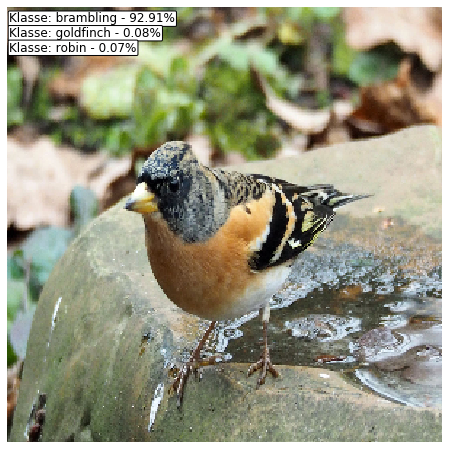

In [46]:
plt.figure(figsize=(8, 8))

pos_x, pos_y = 1,10
for id, lab, prob in decoded:
    plt.text(pos_x, pos_y, 'Klasse: {} - {:.2f}%'.format(lab,prob*100),
            fontsize=12, color='black',
            bbox=dict(boxstyle="round", pad=0.1, fc='white'))
    pos_y += 10

plt.axis('off')
plt.imshow(img)